# Loading Data Set

In [21]:
import pandas as pd

In [22]:
file = pd.read_csv("E-commerce Customer Behavior - Sheet1.csv")

In [23]:
file

,Customer ID,Gender,Age,City,Membership Type,Total Spend,Items Purchased,Average Rating,Discount Applied,Days Since Last Purchase,Satisfaction Level
0,101,Female,29,New York,Gold,1120.20,14,4.6,True,25,Satisfied
1,102,Male,34,Los Angeles,Silver,780.50,11,4.1,False,18,Neutral
2,103,Female,43,Chicago,Bronze,510.75,9,3.4,True,42,Unsatisfied
3,104,Male,30,San Francisco,Gold,1480.30,19,4.7,False,12,Satisfied
4,105,Male,27,Miami,Silver,720.40,13,4.0,True,55,Unsatisfied
...,...,...,...,...,...,...,...,...,...,...,...
345,446,Male,32,Miami,Silver,660.30,10,3.8,True,42,Unsatisfied
346,447,Female,36,Houston,Bronze,470.50,8,3.0,False,27,Neutral
347,448,Female,30,New York,Gold,1190.80,16,4.5,True,28,Satisfied
348,449,Male,34,Los Angeles,Silver,780.20,11,4.2,False,21,Neutral


In [24]:
file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350 entries, 0 to 349
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Customer ID               350 non-null    int64  
 1   Gender                    350 non-null    object 
 2   Age                       350 non-null    int64  
 3   City                      350 non-null    object 
 4   Membership Type           350 non-null    object 
 5   Total Spend               350 non-null    float64
 6   Items Purchased           350 non-null    int64  
 7   Average Rating            350 non-null    float64
 8   Discount Applied          350 non-null    bool   
 9   Days Since Last Purchase  350 non-null    int64  
 10  Satisfaction Level        348 non-null    object 
dtypes: bool(1), float64(2), int64(4), object(4)
memory usage: 27.8+ KB


# Data Cleaning and Preparation

In [25]:
# Rename columns if necessary (e.g., remove spaces)
file.columns = file.columns.str.replace(' ', '_')

# Handle missing values in 'Satisfaction_Level'
file['Satisfaction_Level'].fillna('Unknown', inplace=True)

# Convert 'Satisfaction_Level' to a categorical variable
file['Satisfaction_Level'] = file['Satisfaction_Level'].astype('category')

# Convert 'Discount_Applied' to numeric for clustering (if needed)
file['Discount_Applied'] = file['Discount_Applied'].astype(int)


In [26]:
file

,Customer_ID,Gender,Age,City,Membership_Type,Total_Spend,Items_Purchased,Average_Rating,Discount_Applied,Days_Since_Last_Purchase,Satisfaction_Level
0,101,Female,29,New York,Gold,1120.20,14,4.6,1,25,Satisfied
1,102,Male,34,Los Angeles,Silver,780.50,11,4.1,0,18,Neutral
2,103,Female,43,Chicago,Bronze,510.75,9,3.4,1,42,Unsatisfied
3,104,Male,30,San Francisco,Gold,1480.30,19,4.7,0,12,Satisfied
4,105,Male,27,Miami,Silver,720.40,13,4.0,1,55,Unsatisfied
...,...,...,...,...,...,...,...,...,...,...,...
345,446,Male,32,Miami,Silver,660.30,10,3.8,1,42,Unsatisfied
346,447,Female,36,Houston,Bronze,470.50,8,3.0,0,27,Neutral
347,448,Female,30,New York,Gold,1190.80,16,4.5,1,28,Satisfied
348,449,Male,34,Los Angeles,Silver,780.20,11,4.2,0,21,Neutral


#  Feature Selection

In [27]:
# Example of feature selection
X = file[['Total_Spend', 'Items_Purchased', 'Average_Rating', 'Days_Since_Last_Purchase']]


# Feature Scaling

In [28]:
# Example of feature scaling using StandardScaler
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


# Applying K-means Clustering

In [29]:
# Example of applying K-means clustering
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=4, random_state=42)
file['Cluster'] = kmeans.fit_predict(X_scaled)


C:\Users\FC\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


# Analyzing Results

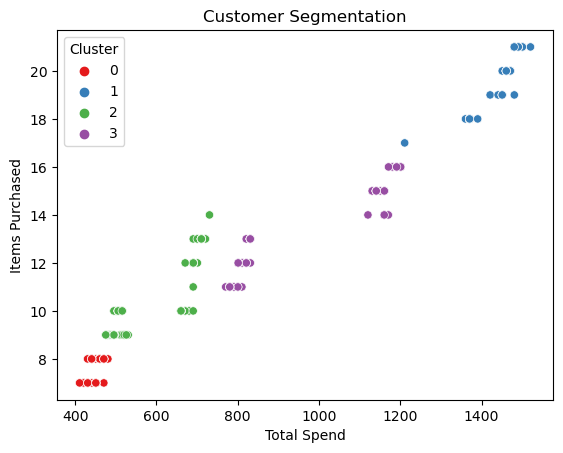

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

# Example of visualizing clusters with matplotlib
sns.scatterplot(x='Total_Spend', y='Items_Purchased', hue='Cluster', data=file, palette='Set1')
plt.title('Customer Segmentation')
plt.xlabel('Total Spend')
plt.ylabel('Items Purchased')
plt.show()


# Interpretation and Actionable Insights

In [31]:
# Example of examining cluster characteristics
# Assuming 'Satisfaction_Level' is causing the issue
numeric_cols = ['Total_Spend', 'Items_Purchased', 'Average_Rating', 'Days_Since_Last_Purchase']

# Convert 'Satisfaction_Level' to a categorical column
file['Satisfaction_Level'] = file['Satisfaction_Level'].astype('category')

# Select numeric columns for clustering
X = file[numeric_cols]

# Scale the numeric columns
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply K-means clustering
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=4, random_state=42)
file['Cluster'] = kmeans.fit_predict(X_scaled)

# Calculate cluster means
cluster_means = file.groupby('Cluster')[numeric_cols].mean()
cluster_counts = file['Cluster'].value_counts()

print("Cluster Means:")
print(cluster_means)

print("\nCluster Counts:")
print(cluster_counts)


C:\Users\FC\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Cluster Means:
         Total_Spend  Items_Purchased  Average_Rating  \
Cluster                                                 
0         446.894828         7.568966        3.193103   
1        1455.549153        19.949153        4.808475   
2         595.136207        10.525862        3.692241   
3         983.337607        13.444444        4.354701   

         Days_Since_Last_Purchase  
Cluster                            
0                       22.758621  
1                       11.288136  
2                       42.982759  
3                       19.948718  

Cluster Counts:
Cluster
3    117
2    116
1     59
0     58
Name: count, dtype: int64
